# MERGED FINAL ANALYSIS

## 0. IMPORT LIBRARIES AND GENERAL DOWNLOADS

In [1]:
import geopandas as gpd 
import pandas as pd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
## IMPORT DATA FOR COMPARISON
# Import map
philly_map = gpd.read_file("../data_analysis/data/philadelphia_zipcode.geojson")

In [3]:
# Import stadiums
stadiums_loc_df = pd.read_csv('../data_analysis/data/stadiums_loc.csv')
gpd.points_from_xy(stadiums_loc_df['Latitude'], stadiums_loc_df['Longitude'])
stadiums_loc_gdf = gpd.GeoDataFrame(stadiums_loc_df,geometry=gpd.points_from_xy(stadiums_loc_df['Latitude'], stadiums_loc_df['Longitude']))

In [4]:
# Import bars
sports_bars_loc_df = pd.read_csv('../data_analysis/data/sports_bars_loc.csv')
gpd.points_from_xy(sports_bars_loc_df['Latitude'], sports_bars_loc_df['Longitude'])
sports_bars_loc_gdf = gpd.GeoDataFrame(sports_bars_loc_df,geometry=gpd.points_from_xy(sports_bars_loc_df['Latitude'], sports_bars_loc_df['Longitude']))

## 1. ARRESTS TABLE

* From arrests_analysis, we want to keeping 2018 and 2019 and clean up the data frame by dropping unnecessary columns.

In [5]:
arrests =  pd.read_csv('../data_analysis/data/arrests_zipcode.csv')
arrests.head(10)

,offense_category,day,zip_code,defendant_race,count,objectid
0,Aggravated Assault,2011-02-21 05:00:00+00,19119,Black,1.0,29259022.0
1,Aggravated Assault,2011-02-21 05:00:00+00,19134,Latinx,1.0,29259023.0
2,Aggravated Assault,2011-02-21 05:00:00+00,19139,Black,1.0,29259024.0
3,Aggravated Assault,2011-02-21 05:00:00+00,19142,Black,1.0,29259025.0
4,Aggravated Assault,2011-02-21 05:00:00+00,19145,Black,1.0,29259026.0
5,Aggravated Assault,2011-02-21 05:00:00+00,19145,White,1.0,29259027.0
6,Aggravated Assault,2011-02-22 05:00:00+00,19114,White,1.0,29259028.0
7,Aggravated Assault,2011-02-22 05:00:00+00,19124,Black,1.0,29259029.0
8,Aggravated Assault,2011-02-22 05:00:00+00,19124,Latinx,1.0,29259030.0
9,Aggravated Assault,2011-02-22 05:00:00+00,19125,White,1.0,29259031.0


In [6]:
# Drop columns that are not needed
arrests2 = arrests.drop(columns='objectid')

In [7]:
# Convert the 'day' column to a pandas datetime object
arrests2['date'] = arrests2['day'].str.split().str[0]
arrests2['hour'] = arrests2['day'].str.split().str[1]

In [8]:
# Filter for 2018 or 2019
arrests2 = arrests2[(arrests2['date'].str[:4] == '2018') | (arrests2['date'].str[:4] == '2019')]
arrests2.drop(columns=['day'], inplace=True)

In [9]:
# arrests to datetime 
# Create a new 'Date' column by combining 'year', 'month', and 'day'
arrests2['date'] = pd.to_datetime(arrests2['date'])
arrests2.head(10)

,offense_category,zip_code,defendant_race,count,date,hour
16048,Aggravated Assault,19154,White,1.0,2019-11-08,05:00:00+00
16049,Aggravated Assault,19107,Latinx,2.0,2019-11-09,05:00:00+00
16050,Aggravated Assault,19119,Black,1.0,2019-11-09,05:00:00+00
16051,Aggravated Assault,19125,Latinx,1.0,2019-11-09,05:00:00+00
16052,Aggravated Assault,19132,Black,1.0,2019-11-09,05:00:00+00
16053,Aggravated Assault,19142,Black,1.0,2019-11-09,05:00:00+00
16054,Aggravated Assault,19143,Black,1.0,2019-11-09,05:00:00+00
16055,Aggravated Assault,19149,White,1.0,2019-11-09,05:00:00+00
16056,Aggravated Assault,19133,Latinx,1.0,2019-11-10,05:00:00+00
16057,Aggravated Assault,19134,White,1.0,2019-11-10,05:00:00+00


In [10]:
# Look at the various arrest categories (we'll mainly use all of them at once, 
# but DUI and Aggravated Assault is interesting in reference to sports bars and stadiums)
arrests2.value_counts(['offense_category'])

offense_category             
Drug Possession                  6212
Drug Sales                       5999
Aggravated Assault               5590
DUI                              5277
Burglary/Residential             1459
Auto Theft                       1312
Criminal Mischief                1048
Burglary/Commercial               426
Carjacking                        143
Arson                             121
Drug Possession in Jails          116
Disorderly Conduct                 47
Altered Firearm Serial Number       8
dtype: int64

In [11]:
# establish baseline of all arrests by day by zipcode
baseline_arrests = arrests2.groupby(['zip_code'])['count'].mean().reset_index()
baseline_arrests.head(10)

,zip_code,count
0,19102,1.133758
1,19103,1.147619
2,19104,1.320681
3,19106,1.086420
4,19107,1.152493
5,19109,1.062500
6,19111,1.127208
7,19112,1.000000
8,19114,1.184466
9,19115,1.230769


In [12]:
# Merge the map data with baseline arrests data
merged_baseline = philly_map.merge(baseline_arrests, left_on='CODE', right_on='zip_code', how='left')
merged_baseline.head(10)

,OBJECTID,CODE,COD,Shape__Area,Shape__Length,geometry,zip_code,count
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045...",19120,1.203144
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994...",19121,1.207493
2,3,19122,22,3.591632e+07,24124.645221,"POLYGON ((-75.15406 39.98601, -75.15328 39.985...",19122,1.153571
3,4,19123,23,3.585175e+07,26421.728982,"POLYGON ((-75.15190 39.97056, -75.15150 39.970...",19123,1.157205
4,5,19124,24,1.448080e+08,63658.770420,"POLYGON ((-75.09660 40.04249, -75.09281 40.039...",19124,1.271671
5,6,19125,25,4.822625e+07,30113.604536,"POLYGON ((-75.10849 39.97030, -75.11051 39.969...",19125,1.213983
6,7,19126,26,3.306658e+07,26114.900637,"POLYGON ((-75.12212 40.05317, -75.12227 40.052...",19126,1.140845
7,8,19127,27,1.624429e+07,29133.850884,"POLYGON ((-75.23631 40.03486, -75.23627 40.034...",19127,1.034483
8,9,19128,28,1.963505e+08,76282.328427,"POLYGON ((-75.22602 40.07914, -75.22599 40.079...",19128,1.071429
9,10,19102,2,4.538805e+06,13170.292163,"POLYGON ((-75.16196 39.95958, -75.16206 39.959...",19102,1.133758


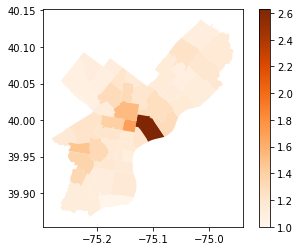

In [13]:
# BASELINE AVERAGE CRIME RATE IN THE ZIPCODES 
base = merged_baseline.plot(column='count', legend = True,cmap='Oranges')

The darker the red, the more arrests in that area.

<Axes: >

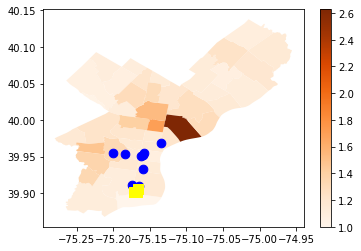

In [14]:
# Plot sports bars and stadiums on the same map
base = merged_baseline.plot(column='count', legend = True,cmap='Oranges')
sports_bars_loc_gdf.plot(ax=base, color='blue', marker='o', markersize=75, label='Sports Bars')
stadiums_loc_gdf.plot(ax=base, color='yellow', marker='s', markersize=85, label='Stadiums')

If anything, this data shows up that there are less arrests in the zipcodes surrounding sports bars and the stadiums.

In [15]:
# get a baseline arrest 
baseline_arrests['avg_baseline_arrest'] = baseline_arrests['count']
baseline_arrests.head()

,zip_code,count,avg_baseline_arrest
0,19102,1.133758,1.133758
1,19103,1.147619,1.147619
2,19104,1.320681,1.320681
3,19106,1.086420,1.086420
4,19107,1.152493,1.152493


## 2A. SIXERS DATA

In [16]:
sixers_data = pd.read_csv('../data_analysis/data/sixers.csv')
# drop columns that are not needed
sixers_clean = sixers_data.drop(columns= ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 8', 'Tm', 'Opp', 'W', 'L', 'Streak', 'Notes'])


# ---------------------------------------------
#     Split the year / month
# ---------------------------------------------
# Add the year
sixers_clean['year'] = sixers_clean['Date'].str.split().str[3]
sixers_clean['day']= sixers_clean['Date'].str.split().str[2]

# take away the comma
sixers_clean['day']= sixers_clean['day'].str.replace(',', '')
sixers_clean['month']=sixers_clean['Date'].str.split().str[1]

# map to change the date
months_dict = {'Apr':'04', 'May':'05'}
sixers_clean['month']=sixers_clean['month'].map(months_dict)


# ----------------------------------------------------
#     Create final date column 
# ----------------------------------------------------
# Create a new 'Date' column by combining 'year', 'month', and 'day'
sixers_clean['Date'] = pd.to_datetime(sixers_clean[['year', 'month', 'day']], format='%Y-%m-%d')

# ----------------------------------------------------
#     Final cleaning
# ----------------------------------------------------
# Drop the row that is null 
sixers_clean = sixers_clean[sixers_clean['G'] != 'G']

# Drop the individual 'year', 'month', and 'day' columns if not needed
sixers_clean.drop(columns=['year', 'month', 'day'], inplace=True)
sixers_clean.rename(columns={'Unnamed: 7': 'Outcome', 'Start (ET)': 'Hour','Unnamed: 5':'Home'}, inplace=True)
# Change the home game column 
sixers_clean['Home'].fillna('home', inplace=True)


# Home games 
outsidegames_filter = sixers_clean['Home'].str.contains('@')
sixers_outside_games = sixers_clean[outsidegames_filter]
sixers_homegames = sixers_clean[-outsidegames_filter]
sixers_clean

,G,Date,Hour,Home,Opponent,Outcome
0,1,2019-04-13,2:30p,home,Brooklyn Nets,L
1,2,2019-04-15,8:00p,home,Brooklyn Nets,W
2,3,2019-04-18,8:00p,@,Brooklyn Nets,W
3,4,2019-04-20,3:00p,@,Brooklyn Nets,W
4,5,2019-04-23,8:00p,home,Brooklyn Nets,W
6,6,2019-04-27,7:30p,@,Toronto Raptors,L
7,7,2019-04-29,8:00p,@,Toronto Raptors,W
8,8,2019-05-02,8:00p,home,Toronto Raptors,W
9,9,2019-05-05,3:30p,home,Toronto Raptors,L
10,10,2019-05-07,8:00p,@,Toronto Raptors,L


In [17]:
sixers_clean['Date'] = pd.to_datetime(sixers_clean['Date'])
arrests2['date'] = pd.to_datetime(arrests2['date'])

# Merge sixers and arrets to get only the dataframe for the dates 
arrests_sixers = pd.merge(arrests2, sixers_clean, left_on=['date'], right_on=['Date'])
arrests_sixers

,offense_category,zip_code,defendant_race,count,date,hour,G,Date,Hour,Home,Opponent,Outcome
0,Aggravated Assault,19104,Black,1.0,2019-04-13,04:00:00+00,1,2019-04-13,2:30p,home,Brooklyn Nets,L
1,Aggravated Assault,19107,Black,1.0,2019-04-13,04:00:00+00,1,2019-04-13,2:30p,home,Brooklyn Nets,L
2,Aggravated Assault,19116,White,1.0,2019-04-13,04:00:00+00,1,2019-04-13,2:30p,home,Brooklyn Nets,L
3,Aggravated Assault,19123,Black,1.0,2019-04-13,04:00:00+00,1,2019-04-13,2:30p,home,Brooklyn Nets,L
4,Aggravated Assault,19134,Black,1.0,2019-04-13,04:00:00+00,1,2019-04-13,2:30p,home,Brooklyn Nets,L
...,...,...,...,...,...,...,...,...,...,...,...,...
477,Drug Possession,19144,Black,1.0,2019-05-12,04:00:00+00,12,2019-05-12,7:00p,@,Toronto Raptors,L
478,Drug Possession,Unknown,White,1.0,2019-05-12,04:00:00+00,12,2019-05-12,7:00p,@,Toronto Raptors,L
479,Drug Sales,19134,Black,3.0,2019-05-12,04:00:00+00,12,2019-05-12,7:00p,@,Toronto Raptors,L
480,Drug Sales,19134,Latinx,1.0,2019-05-12,04:00:00+00,12,2019-05-12,7:00p,@,Toronto Raptors,L


### Wins vs Losses Sixers for the 2018 season

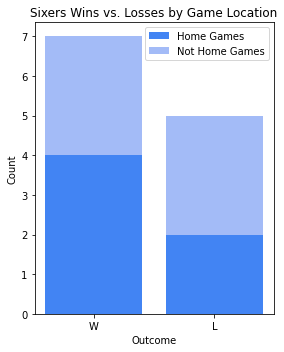

Home games:
 W    4
L    2
Name: Outcome, dtype: int64 

 Games away:
 W    3
L    3
Name: Outcome, dtype: int64


In [18]:
# Count the outcomes for each category
home_game_counts = sixers_homegames["Outcome"].value_counts()
not_home_game_counts = sixers_outside_games["Outcome"].value_counts()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(4, 5))

index = range(len(home_game_counts))

# Plot for home games (wins and losses stacked)
ax.bar(index, home_game_counts.values, label='Home Games', color=['#4284F3'])
ax.bar(index, not_home_game_counts.values, bottom=home_game_counts.values, label='Not Home Games', color=['#A3BBF7'])

ax.set_title('Sixers Wins vs. Losses by Game Location')
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_xticks(index)
ax.set_xticklabels(home_game_counts.index, rotation=0)
ax.legend()

plt.tight_layout()
plt.show()
print('Home games:\n',home_game_counts,'\n\n Games away:\n',not_home_game_counts)

The Sixers had more wins at home games.

### MERGING ARRESTS WITH SIXERS DATA 

In [19]:
# Import to datetime
sixers_clean['Date'] = pd.to_datetime(sixers_clean['Date'])
arrests2['date'] = pd.to_datetime(arrests2['date'])

# Merge sixers and arrets to get only the dataframe for the dates 
arrests_sixers = pd.merge(arrests2, sixers_clean, left_on=['date'], right_on=['Date'])

# Drop the redundant "Date" 
arrests_sixers = arrests_sixers.drop(['Date'], axis=1)


# Create dataframe for average arrest by zipcode on dates when there is a game 
zipcode_sizers_arrests = arrests_sixers.groupby('zip_code')['count'].mean().reset_index()
zipcode_sizers_arrests.rename(columns={'count': 'avg_arrests_sixers'}, inplace=True)
zipcode_sizers_arrests.head()

# Now merge the average arrests sixers with the average arrests normal 
baseline_with_sixers_arrests = baseline_arrests.merge(zipcode_sizers_arrests, left_on='zip_code',right_on='zip_code',how='left')
baseline_with_sixers_arrests = baseline_with_sixers_arrests.dropna()
baseline_with_sixers_arrests['percent_change'] = (baseline_with_sixers_arrests['avg_arrests_sixers'] - baseline_with_sixers_arrests['avg_baseline_arrest'])/baseline_with_sixers_arrests['avg_baseline_arrest']
arrests_sixers

,offense_category,zip_code,defendant_race,count,date,hour,G,Hour,Home,Opponent,Outcome
0,Aggravated Assault,19104,Black,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
1,Aggravated Assault,19107,Black,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
2,Aggravated Assault,19116,White,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
3,Aggravated Assault,19123,Black,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
4,Aggravated Assault,19134,Black,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
...,...,...,...,...,...,...,...,...,...,...,...
477,Drug Possession,19144,Black,1.0,2019-05-12,04:00:00+00,12,7:00p,@,Toronto Raptors,L
478,Drug Possession,Unknown,White,1.0,2019-05-12,04:00:00+00,12,7:00p,@,Toronto Raptors,L
479,Drug Sales,19134,Black,3.0,2019-05-12,04:00:00+00,12,7:00p,@,Toronto Raptors,L
480,Drug Sales,19134,Latinx,1.0,2019-05-12,04:00:00+00,12,7:00p,@,Toronto Raptors,L


#### MAP -ALL GAMES THE ARRESTS COUNT AVERAGE WHEN THERE IS A GAME 

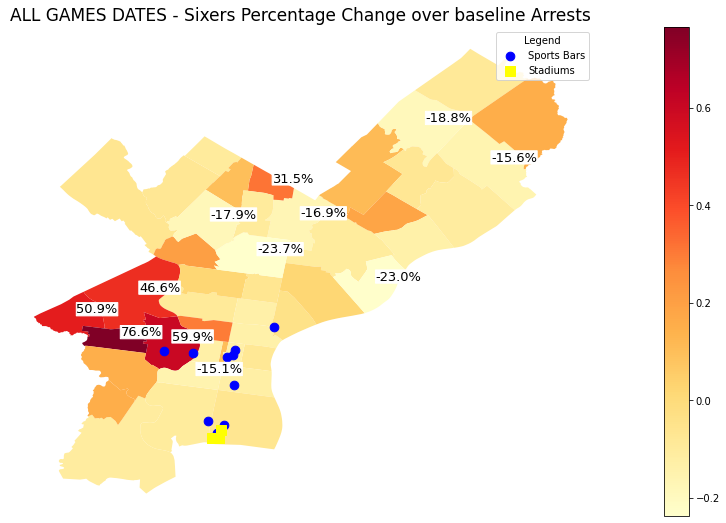

In [20]:
# Create a base map
map_sixers_arrests = philly_map.merge(baseline_with_sixers_arrests, left_on='CODE', right_on='zip_code', how='left')
map_sixers_arrests
base = map_sixers_arrests.plot(column='percent_change', legend=True, cmap='YlOrRd',figsize=(25, 9))

# Plot additional data on the same map
sports_bars_loc_gdf.plot(ax=base, color='blue', marker='o', markersize=75, label='Sports Bars')
stadiums_loc_gdf.plot(ax=base, color='yellow', marker='s', markersize=85, label='Stadiums')


# Adding percentage labels to the map
threshold_positive = 0.3
threshold_negative = - 0.15
for idx, row in map_sixers_arrests.iterrows():
    if row["percent_change"] > threshold_positive or row["percent_change"] < threshold_negative:
        plt.annotate(f'{row["percent_change"]*100:.1f}%', 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3),  # Offset for the text label
                     textcoords='offset points',
                     fontsize=13,
                     color='black',
                     bbox=dict(boxstyle='round, pad=0.01',edgecolor='white', facecolor='white'))  # Add a white background

# Add legend
legend = plt.legend(loc='upper right')
legend.set_title("Legend")

plt.title('ALL GAMES DATES - Sixers Percentage Change over baseline Arrests',size=17)
plt.axis('off')  # Turn off the axis

# Display the map
plt.show()

* Here we see that the amount of arrests during game day do in fact move on average in terms on the zone and they focus on the left side
* We see they are no directly concentrated in the stadiums area, however, they are highly concentrated on the left zone which is something worth investigating for us 

#### MAP THE ARRESTS COUNT AVERAGE WHEN THERE IS A **HOME** GAME 

In [21]:
# Import to datetime
sixers_homegames['Date'] = pd.to_datetime(sixers_homegames['Date'])
arrests2['date'] = pd.to_datetime(arrests2['date'])

# Merge sixers and arrets to get only the dataframe for the dates 
arrests_sixers_home = pd.merge(arrests2, sixers_homegames, left_on=['date'], right_on=['Date'])

# Drop the redundant "Date" 
arrests_sixers_home = arrests_sixers_home.drop(['Date'], axis=1)

# Create dataframe for average arrest by zipcode on dates when there is a game 
zipcode_sizers_arrests_home = arrests_sixers_home.groupby('zip_code')['count'].mean().reset_index()
zipcode_sizers_arrests_home.rename(columns={'count': 'avg_arrests_sixers'}, inplace=True)

# Now merge the average arrests sixers with the average arrests normal 
baseline_with_sixers_arrests_home = baseline_arrests.merge(zipcode_sizers_arrests_home, left_on='zip_code',right_on='zip_code',how='left')
baseline_with_sixers_arrests_home = baseline_with_sixers_arrests_home.dropna()
baseline_with_sixers_arrests_home['percent_change'] = (baseline_with_sixers_arrests_home['avg_arrests_sixers'] - baseline_with_sixers_arrests_home['avg_baseline_arrest'])/baseline_with_sixers_arrests_home['avg_baseline_arrest']
baseline_with_sixers_arrests_home.head(2)
arrests_sixers_home

/tmp/ipykernel_3616904/4109887740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixers_homegames['Date'] = pd.to_datetime(sixers_homegames['Date'])


,offense_category,zip_code,defendant_race,count,date,hour,G,Hour,Home,Opponent,Outcome
0,Aggravated Assault,19104,Black,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
1,Aggravated Assault,19107,Black,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
2,Aggravated Assault,19116,White,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
3,Aggravated Assault,19123,Black,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
4,Aggravated Assault,19134,Black,1.0,2019-04-13,04:00:00+00,1,2:30p,home,Brooklyn Nets,L
...,...,...,...,...,...,...,...,...,...,...,...
243,Drug Sales,19140,Latinx,2.0,2019-05-09,04:00:00+00,11,8:00p,home,Toronto Raptors,W
244,Drug Sales,19142,Black,1.0,2019-05-09,04:00:00+00,11,8:00p,home,Toronto Raptors,W
245,Drug Sales,19143,Black,3.0,2019-05-09,04:00:00+00,11,8:00p,home,Toronto Raptors,W
246,Drug Sales,19148,Latinx,1.0,2019-05-09,04:00:00+00,11,8:00p,home,Toronto Raptors,W


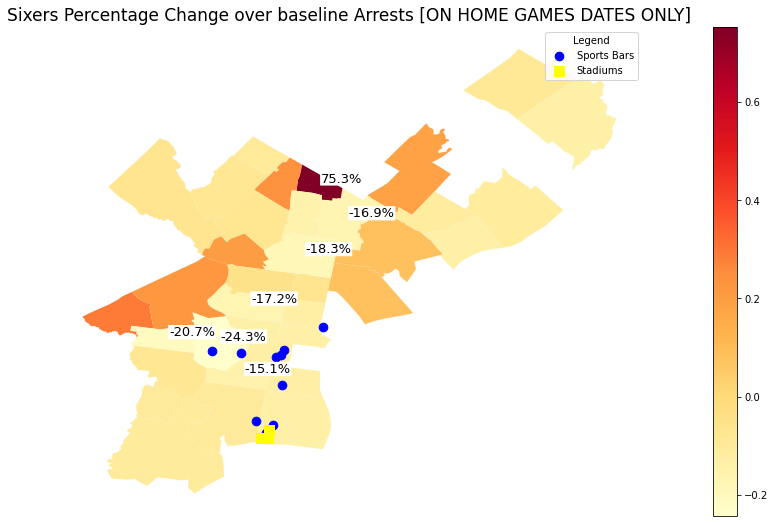

In [22]:
# ------------------------------------------------------------
#         MAP
# ------------------------------------------------------------
# Create a base map
map_sixers_arrests = philly_map.merge(baseline_with_sixers_arrests_home, left_on='CODE', right_on='zip_code', how='left')
map_sixers_arrests
base = map_sixers_arrests.plot(column='percent_change', legend=True, cmap='YlOrRd',figsize=(25, 9))

# Plot additional data on the same map
sports_bars_loc_gdf.plot(ax=base, color='blue', marker='o', markersize=75, label='Sports Bars')
stadiums_loc_gdf.plot(ax=base, color='yellow', marker='s', markersize=85, label='Stadiums')



# Adding percentage labels to the map
threshold_positive = 0.3
threshold_negative = - 0.15
for idx, row in map_sixers_arrests.iterrows():
    if row["percent_change"] > threshold_positive or row["percent_change"] < threshold_negative:
        plt.annotate(f'{row["percent_change"]*100:.1f}%', 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3),  # Offset for the text label
                     textcoords='offset points',
                     fontsize=13,
                     color='black',
                     bbox=dict(boxstyle='round, pad=0.01',edgecolor='white', facecolor='white'))  # Add a white background

# Add legend
legend = plt.legend(loc='upper right')
legend.set_title("Legend")

plt.title('Sixers Percentage Change over baseline Arrests [ON HOME GAMES DATES ONLY]',size=17)
plt.axis('off')  # Turn off the axis

# Display the map
plt.show()

Comparatively, Sixers home games seem to correlate with less arrests to the left of Philly.

## 2B. EAGLES DATA 

* Important metadata:
    *   Home or Away Game --> @ means it is an away game.

In [23]:
eagles_data = pd.read_csv('../data_analysis/data/eagles.csv')

# drop columns that are not needed
eagles_clean = eagles_data.drop(columns=['RECORD'])

# add column to single out the outcome
eagles_clean['Outcome'] = eagles_data['SCORE'].str[0]

eagles_clean.rename(columns={'OPP': 'Opponent', 'date':'Date','Unnamed: 1':'Home'}, inplace = True)

#
# Change the home game column 
eagles_clean['Home'] = eagles_clean['Home'].str.replace('vs', 'home')

# ---------------------------------------------
#     Split 
# ---------------------------------------------
# Add the year
eagles_clean['year'] = 2018
eagles_clean['month_day']= eagles_clean['DATE'].str.split().str[1]
eagles_clean['month']= eagles_clean['month_day'].str.split('/').str[0]
eagles_clean['day']= eagles_clean['month_day'].str.split('/').str[1]

# ----------------------------------------------------
#     Create final date column & dropping others created in the process
# ----------------------------------------------------
# Create a new 'Date' column by combining 'year', 'month', and 'day'
eagles_clean['Date'] = pd.to_datetime(eagles_clean[['year', 'month', 'day']], format='%Y-%m-%d')

# Drop the individual 'year', 'month', and 'day' columns if not needed
eagles_clean.drop(columns=['year', 'month', 'day', 'month_day', 'DATE'], inplace=True)

# Home games 
outsidegames_filter = eagles_clean['Home'].str.contains('@')
eagles_outside_games = eagles_clean[outsidegames_filter]
eagles_homegames = eagles_clean[-outsidegames_filter]

eagles_clean

,Home,Opponent,SCORE,Outcome,Date
0,@,WAS,W 24-0,W,2018-12-30
1,home,HOU,W 32-30,W,2018-12-23
2,@,LAR,W 30-23,W,2018-12-16
3,@,DAL,L 23-29,L,2018-12-09
4,home,WAS,W 28-13,W,2018-12-03
5,home,NYG,W 25-22,W,2018-11-25
6,@,NO,L 7-48,L,2018-11-18
7,home,DAL,L 20-27,L,2018-11-11
8,@,JAX,W 24-18,W,2018-10-28
9,home,CAR,L 17-21,L,2018-10-21


### Wins vs Losses Eagles for the 2018 season

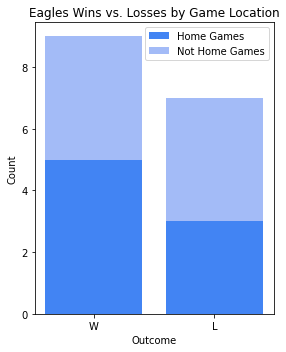

Home games:
 W    5
L    3
Name: Outcome, dtype: int64 

 Games away:
 W    4
L    4
Name: Outcome, dtype: int64


In [24]:
# Count the outcomes for each category
home_game_counts = eagles_homegames["Outcome"].value_counts()
not_home_game_counts = eagles_outside_games["Outcome"].value_counts()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(4, 5))

index = range(len(home_game_counts))

# Plot for home games (wins and losses stacked)
ax.bar(index, home_game_counts.values, label='Home Games', color=['#4284F3'])
ax.bar(index, not_home_game_counts.values, bottom=home_game_counts.values, label='Not Home Games', color=['#A3BBF7'])

ax.set_title('Eagles Wins vs. Losses by Game Location')
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_xticks(index)
ax.set_xticklabels(home_game_counts.index, rotation=0)
ax.legend()

plt.tight_layout()
plt.show()
print('Home games:\n',home_game_counts,'\n\n Games away:\n',not_home_game_counts)

Eagles won more home games than lost home games.

### MERGING ARRESTS WITH EAGLES DATA 

In [25]:
arrests_eagles = pd.merge(arrests2, eagles_clean, left_on=['date'], right_on=['Date'])

# Drop the redundant "Date" 
arrests_eagles = arrests_eagles.drop(['Date'], axis=1)

# Display the merged dataframe
arrests_eagles.head(2)

# Display the merged dataframe
zipcode_eagles_arrests = arrests_eagles.groupby('zip_code')['count'].mean().reset_index()
zipcode_eagles_arrests.rename(columns={'count': 'avg_arrests_eagles'}, inplace=True)
zipcode_eagles_arrests.head()

# Now merge the average arrests sixers with the average arrests normal 
baseline_with_eagles_arrests = baseline_arrests.merge(zipcode_eagles_arrests, left_on='zip_code',right_on='zip_code',how='left')
baseline_with_eagles_arrests = baseline_with_eagles_arrests.dropna()
baseline_with_eagles_arrests['percent_change'] = (baseline_with_eagles_arrests['avg_arrests_eagles'] - baseline_with_eagles_arrests['avg_baseline_arrest'])/baseline_with_eagles_arrests['avg_baseline_arrest']
baseline_with_eagles_arrests.head()

,zip_code,count,avg_baseline_arrest,avg_arrests_eagles,percent_change
0,19102,1.133758,1.133758,1.500000,0.323034
1,19103,1.147619,1.147619,1.500000,0.307054
2,19104,1.320681,1.320681,1.166667,-0.116617
3,19106,1.086420,1.086420,1.000000,-0.079545
4,19107,1.152493,1.152493,1.200000,0.041221


### MAP % INCREASE ARRESTS WITH EAGLES DATA 

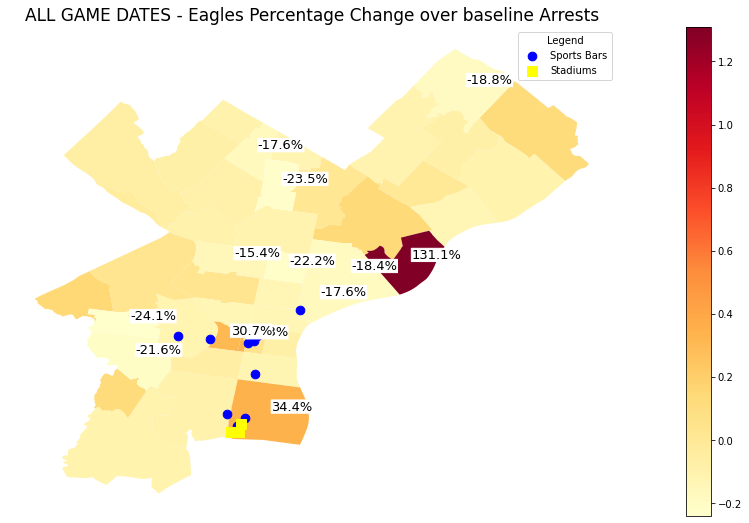

In [26]:
# Create a base map
map_eagles_arrests = philly_map.merge(baseline_with_eagles_arrests, left_on='CODE', right_on='zip_code', how='left')
base = map_eagles_arrests.plot(column='percent_change', legend=True, cmap='YlOrRd',figsize=(25, 9))

# Plot additional data on the same map
sports_bars_loc_gdf.plot(ax=base, color='blue', marker='o', markersize=75, label='Sports Bars')
stadiums_loc_gdf.plot(ax=base, color='yellow', marker='s', markersize=85, label='Stadiums')


# Adding percentage labels to the map
threshold_positive = 0.3
threshold_negative = - 0.15
for idx, row in map_eagles_arrests.iterrows():
    if row["percent_change"] > threshold_positive or row["percent_change"] < threshold_negative:
        plt.annotate(f'{row["percent_change"]*100:.1f}%', 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3),  # Offset for the text label
                     textcoords='offset points',
                     fontsize=13,
                     color='black',
                     bbox=dict(boxstyle='round, pad=0.01',edgecolor='white', facecolor='white'))  # Add a white background

# Add legend
legend = plt.legend(loc='upper right')
legend.set_title("Legend")

plt.title('ALL GAME DATES - Eagles Percentage Change over baseline Arrests',size=17)
plt.axis('off')  # Turn off the axis

# Display the map
plt.show()

### ONLY HOME GAMES MAP

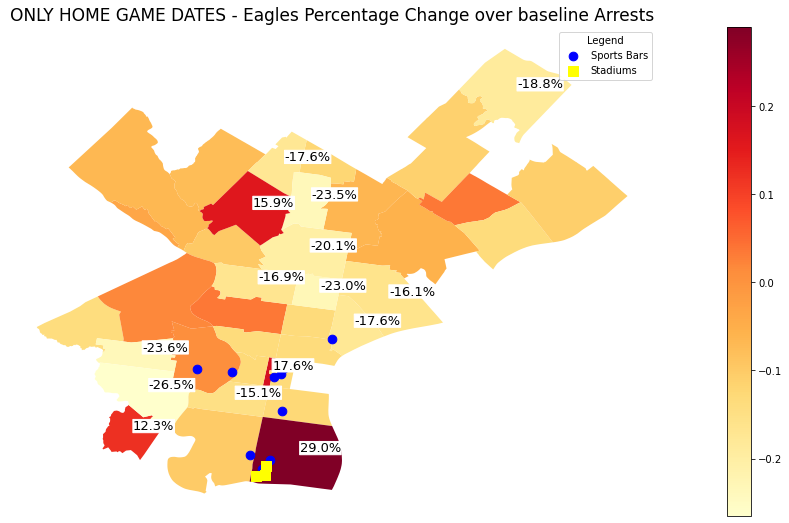

In [27]:
arrests_eagles_home = pd.merge(arrests2, eagles_homegames, left_on=['date'], right_on=['Date'])

# Drop the redundant "Date" 
arrests_eagles_home = arrests_eagles_home.drop(['Date'], axis=1)


# Display the merged dataframe
zipcode_eagles_arrests_home = arrests_eagles_home.groupby('zip_code')['count'].mean().reset_index()
zipcode_eagles_arrests_home.rename(columns={'count': 'avg_arrests_eagles'}, inplace=True)

# Now merge the average arrests sixers with the average arrests normal 
baseline_with_eagles_arrests_home = baseline_arrests.merge(zipcode_eagles_arrests_home, left_on='zip_code',right_on='zip_code',how='left')
baseline_with_eagles_arrests_home = baseline_with_eagles_arrests_home.dropna()
baseline_with_eagles_arrests_home['percent_change'] = (baseline_with_eagles_arrests_home['avg_arrests_eagles'] - baseline_with_eagles_arrests_home['avg_baseline_arrest'])/baseline_with_eagles_arrests_home['avg_baseline_arrest']
baseline_with_eagles_arrests_home.head()

# ---------------------------------
#            MAP 
# ---------------------------------
# Create a base map
map_eagles_arrests = philly_map.merge(baseline_with_eagles_arrests_home, left_on='CODE', right_on='zip_code', how='left')
base = map_eagles_arrests.plot(column='percent_change', legend=True, cmap='YlOrRd',figsize=(25, 9))

# Plot additional data on the same map
sports_bars_loc_gdf.plot(ax=base, color='blue', marker='o', markersize=75, label='Sports Bars')
stadiums_loc_gdf.plot(ax=base, color='yellow', marker='s', markersize=85, label='Stadiums')


# Adding percentage labels to the map
threshold_positive = 0.1
threshold_negative = - 0.15
for idx, row in map_eagles_arrests.iterrows():
    if row["percent_change"] > threshold_positive or row["percent_change"] < threshold_negative:
        plt.annotate(f'{row["percent_change"]*100:.1f}%', 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3),  # Offset for the text label
                     textcoords='offset points',
                     fontsize=13,
                     color='black',
                     bbox=dict(boxstyle='round, pad=0.01',edgecolor='white', facecolor='white'))  # Add a white background

# Add legend
legend = plt.legend(loc='upper right')
legend.set_title("Legend")

plt.title('ONLY HOME GAME DATES - Eagles Percentage Change over baseline Arrests',size=17)
plt.axis('off')  # Turn off the axis

# Display the map
plt.show()

Dramatic increase of 29% more arrests in the zipcode nearest the stadiums with Eagles home games which aligns with our hypothesis. 

## C. PHILLIES DATA 

* Important metadata: 
    *   Home or Away Game --> @ means it is an away game, blank means home.

In [28]:
phillies_data = pd.read_csv('../data_analysis/data/phillies.csv')

# drop columns that are not needed
phillies_cleaning = phillies_data.drop(columns = ['Gm#', 'R', 'RA', 'Inn', 'GB', 'W-L', 'Win', 
                                    'Loss', 'Save', 'Time', 'cLI', 'Streak', 'Orig. Scheduled', 'Unnamed: 2'])

# Rename W/L to Outcome
phillies_clean = phillies_cleaning.rename(columns = {'W/L' : 'Outcome','Opp': 'Opponent','Unnamed: 4':'Home'})

# ---------------------------------------------
#     Split 
# ---------------------------------------------
# Add the year
phillies_clean['year'] = 2018
phillies_clean['day']= phillies_clean['Date'].str.split().str[2]
phillies_clean['month']= phillies_clean['Date'].str.split().str[1]

# Change the home game column 
phillies_clean['Home'].fillna('home', inplace=True)


# Drop the row that is null 
phillies_clean = phillies_clean.dropna()

# Map to change the date
months_dict = {'Mar': '03' , 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul':'07', 'Aug':'08', 'Sep':'09'}
phillies_clean['month']=phillies_clean['month'].map(months_dict)

# Create the final year column
# Create a new 'Date' column by combining 'year', 'month', and 'day'
phillies_clean['Date'] = pd.to_datetime(phillies_clean[['year', 'month', 'day']], format='%Y-%m-%d')


# Just keep first letter from outcome
# Extract the first letter from the "Outcome" column and store it in a new column "Outcome_First_Letter"
phillies_clean["Outcome"] = phillies_clean["Outcome"].str[0]


# Drop the individual 'year', 'month', and 'day' columns if not needed
phillies_clean.drop(columns=['year', 'month', 'day'], inplace=True)

# Home games 
outsidegames_filter = phillies_clean['Home'].str.contains('@')
phillies_outside_games = phillies_clean[outsidegames_filter]
phillies_homegames = phillies_clean[-outsidegames_filter]

### Wins vs Losses Phillies for the 2018 season

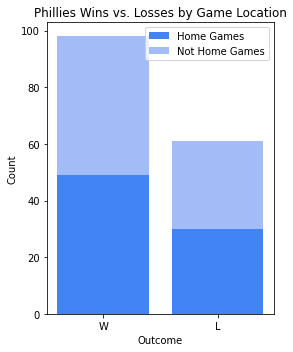

Home games:
 W    49
L    30
Name: Outcome, dtype: int64 

 Games away:
 L    49
W    31
Name: Outcome, dtype: int64


In [29]:
# Count the outcomes for each category
home_game_counts = phillies_homegames["Outcome"].value_counts()
not_home_game_counts = phillies_outside_games["Outcome"].value_counts()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(4, 5))

index = range(len(home_game_counts))

# Plot for home games (wins and losses stacked)
ax.bar(index, home_game_counts.values, label='Home Games', color=['#4284F3'])
ax.bar(index, not_home_game_counts.values, bottom=home_game_counts.values, label='Not Home Games', color=['#A3BBF7'])

ax.set_title('Phillies Wins vs. Losses by Game Location')
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_xticks(index)
ax.set_xticklabels(home_game_counts.index, rotation=0)
ax.legend()

plt.tight_layout()
plt.show()
print('Home games:\n',home_game_counts,'\n\n Games away:\n',not_home_game_counts)

* Quite fair split for wins and losses home vs away

### Merge Phillies with arrests data 

In [30]:
arrests_phillies = pd.merge(arrests2, phillies_clean, left_on=['date'], right_on=['Date'])

# Drop the redundant "Date" 
arrests_phillies = arrests_phillies.drop(['Date'], axis=1)

# Gruopby
zipcode_phillies_arrests = arrests_phillies.groupby('zip_code')['count'].mean().reset_index()
zipcode_phillies_arrests.rename(columns={'count': 'avg_arrests_phillies'}, inplace=True)

# Now merge the average arrests sixers with the average arrests normal 
baseline_with_phillies_arrests = baseline_arrests.merge(zipcode_phillies_arrests, left_on='zip_code',right_on='zip_code',how='left')
baseline_with_phillies_arrests = baseline_with_phillies_arrests.dropna()
baseline_with_phillies_arrests['percent_change'] = (baseline_with_phillies_arrests['avg_arrests_phillies'] - baseline_with_phillies_arrests['avg_baseline_arrest'])/baseline_with_phillies_arrests['avg_baseline_arrest']
baseline_with_phillies_arrests.head(2)

,zip_code,count,avg_baseline_arrest,avg_arrests_phillies,percent_change
0,19102,1.133758,1.133758,1.129870,-0.003429
1,19103,1.147619,1.147619,1.157895,0.008954


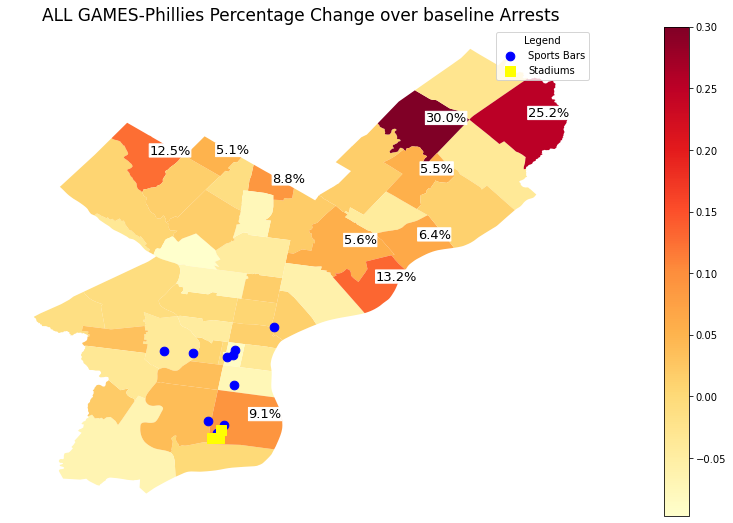

In [31]:
# Create a base map
# Merge the map data with baseline arrests data
map_phillies_arrests = philly_map.merge(baseline_with_phillies_arrests, left_on='CODE', right_on='zip_code', how='left')
base = map_phillies_arrests.plot(column='percent_change', legend=True, cmap='YlOrRd',figsize=(25, 9))

# Plot additional data on the same map
sports_bars_loc_gdf.plot(ax=base, color='blue', marker='o', markersize=75, label='Sports Bars')
stadiums_loc_gdf.plot(ax=base, color='yellow', marker='s', markersize=85, label='Stadiums')


# Adding percentage labels to the map
threshold_positive = 0.05
threshold_negative = - 0.2
for idx, row in map_phillies_arrests.iterrows():
    if row["percent_change"] > threshold_positive or row["percent_change"] < threshold_negative:
        plt.annotate(f'{row["percent_change"]*100:.1f}%', 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3),  # Offset for the text label
                     textcoords='offset points',
                     fontsize=13,
                     color='black',
                     bbox=dict(boxstyle='round, pad=0.01',edgecolor='white', facecolor='white'))  # Add a white background

# Add legend
legend = plt.legend(loc='upper right')
legend.set_title("Legend")

plt.title('ALL GAMES-Phillies Percentage Change over baseline Arrests',size=17)
plt.axis('off')  # Turn off the axis

# Display the map
plt.show()

### ONLY HOME GAMES MAP

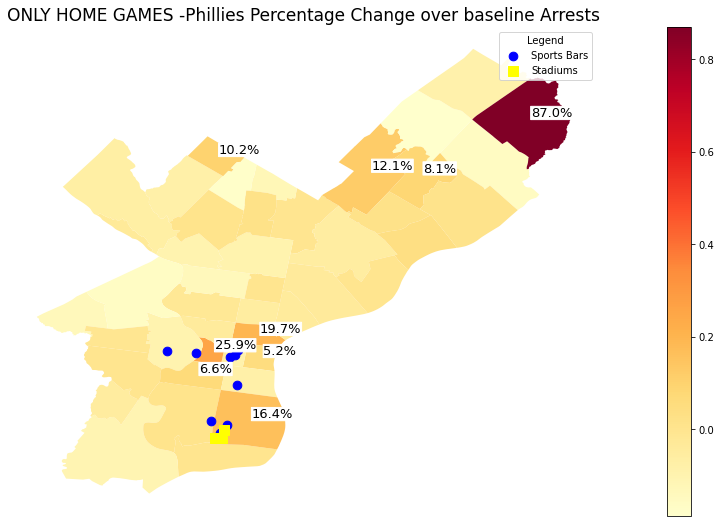

In [32]:
arrests_phillies_homegames = pd.merge(arrests2, phillies_homegames, left_on=['date'], right_on=['Date'])

arrests_phillies_homegames['Attendance'] = pd.to_numeric(arrests_phillies_homegames['Attendance'], errors='coerce')
mean_attendance = arrests_phillies_homegames['Attendance'].mean()
# drop those with attendance below mean for results to be coherent
arrests_phillies_homegames = arrests_phillies_homegames[arrests_phillies_homegames['Attendance'] >= mean_attendance]


# Drop the redundant "Date" 
arrests_phillies_homegames = arrests_phillies_homegames.drop(['Date'], axis=1)

# Gruopby
zipcode_phillies_arrests_home = arrests_phillies_homegames.groupby('zip_code')['count'].mean().reset_index()
zipcode_phillies_arrests_home.rename(columns={'count': 'avg_arrests_phillies'}, inplace=True)

# Now merge the average arrests sixers with the average arrests normal 
baseline_with_phillies_arrests_home = baseline_arrests.merge(zipcode_phillies_arrests_home, left_on='zip_code',right_on='zip_code',how='left')
baseline_with_phillies_arrests_home = baseline_with_phillies_arrests_home.dropna()
baseline_with_phillies_arrests_home['percent_change'] = (baseline_with_phillies_arrests_home['avg_arrests_phillies'] - baseline_with_phillies_arrests_home['avg_baseline_arrest'])/baseline_with_phillies_arrests_home['avg_baseline_arrest']

# ---------------------------------
#            MAP 
# ---------------------------------
# Create a base map
# Merge the map data with baseline arrests data
map_phillies_arrests = philly_map.merge(baseline_with_phillies_arrests_home, left_on='CODE', right_on='zip_code', how='left')
base = map_phillies_arrests.plot(column='percent_change', legend=True, cmap='YlOrRd',figsize=(25, 9))

# Plot additional data on the same map
sports_bars_loc_gdf.plot(ax=base, color='blue', marker='o', markersize=75, label='Sports Bars')
stadiums_loc_gdf.plot(ax=base, color='yellow', marker='s', markersize=85, label='Stadiums')


# Adding percentage labels to the map
threshold_positive = 0.05
threshold_negative = - 0.2
for idx, row in map_phillies_arrests.iterrows():
    if row["percent_change"] > threshold_positive or row["percent_change"] < threshold_negative:
        plt.annotate(f'{row["percent_change"]*100:.1f}%', 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3),  # Offset for the text label
                     textcoords='offset points',
                     fontsize=13,
                     color='black',
                     bbox=dict(boxstyle='round, pad=0.01',edgecolor='white', facecolor='white'))  # Add a white background

# Add legend
legend = plt.legend(loc='upper right')
legend.set_title("Legend")

plt.title('ONLY HOME GAMES -Phillies Percentage Change over baseline Arrests',size=17)
plt.axis('off')  # Turn off the axis

# Display the map
plt.show()

Slight increase in arrests surrounding the stadiums and sports bars which also aligns with our hypothesis,  but a major increase in one zipcode in particular with 87% increase in arrests.

## Short Conclusion

Phillies and Eagles had arrest increases in surrounding zipcodes of the stadiums, but the 76ers did not.